In [1]:
import ndlib.models.epidemics.SIModel as si
import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.epidemics.SISModel as sis
import ndlib.models.epidemics.ThresholdModel as threshold
import ndlib.models.ModelConfig as mc
import networkx as nx
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison

In [41]:
import datetime
import time
import numpy as np

In [165]:
# plot settings
import matplotlib.pyplot as plt

FIGSIZE_TWOCOL = (10,4)
FIGSIZE_ONECOL = (5,4)

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size= MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize= MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize= MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [114]:
nytimes_id = 807095
repubblica_id =18935802
toscanaoggi_id = 76054893
sardegna_id = 1240056290 #@SardegnaPRadio
pensodisi_id = 753694308373499908
sputnick_id =2817304093

In [5]:
g = nx.read_edgelist('../network/networks/edge_list.txt',
                         create_using=nx.DiGraph(), nodetype=int, data=False)

In [6]:
g = g.reverse(copy=True)

In [7]:
degrees = [d for n, d in g.degree]
mean_k = sum(degrees)/len(degrees)


In [176]:
# model configuration
beta = 0.01
beta = 0.01

mu = beta*1.5
Lambda = beta/mu

mu = beta*10
Lambda_loc = beta/mu

print beta
print mu
###########################################################
cfg = mc.Configuration()
cfg.add_model_parameter('beta', beta)
cfg.add_model_parameter('gamma', mu)
cfg.add_model_initial_configuration("Infected", [nytimes_id])
model_ny = sir.SIRModel(g)
model_ny.set_initial_status(cfg)
model_ny.name= '@nytimes'
########################################################### 
cfg_rep = mc.Configuration()
cfg_rep.add_model_parameter('beta', beta)
cfg_rep.add_model_parameter('gamma', mu)
cfg_rep.add_model_initial_configuration("Infected", [repubblica_id])
model_rep = sir.SIRModel(g)
model_rep.set_initial_status(cfg_rep)
model_rep.name= '@repubblica'
###########################################################
cfg_sput = mc.Configuration()
cfg_sput.add_model_parameter('beta', beta)
cfg_sput.add_model_parameter('gamma', mu)
cfg_sput.add_model_initial_configuration("Infected", [sputnick_id])
model_sput = sir.SIRModel(g)
model_sput.set_initial_status(cfg_sput)
model_sput.name= '@sputnik_italia'
###########################################################



0.01
0.1


In [145]:
iterations_ny = model_ny.iteration_bunch(200)
trends_ny = model_ny.build_trends(iterations_ny)

In [146]:
iterations_rep = model_rep.iteration_bunch(200)
trends_rep = model_rep.build_trends(iterations_rep)

In [147]:
iterations_sput = model_sput.iteration_bunch(200)
trends_sput = model_sput.build_trends(iterations_sput)

In [154]:
# change mu to higher values for a 'local news' simulation
iterations_ny_loc = model_ny.iteration_bunch(200)
trends_ny_loc = model_ny.build_trends(iterations_ny_loc)
print 'ny done'

iterations_rep_loc = model_rep.iteration_bunch(200)
trends_rep_loc = model_rep.build_trends(iterations_rep_loc)
print 'rep done'

iterations_sput_loc = model_sput.iteration_bunch(200)
trends_sput_loc = model_sput.build_trends(iterations_sput_loc)

ny done


rep done


In [148]:
N = len(degrees)
N = 49728
cod_inf = model_rep.get_status_map()['Infected']
infected_ny   = np.array(trends_ny[0]['trends']['node_count'][cod_inf]).astype(float)/N
infected_rep  = np.array(trends_rep[0]['trends']['node_count'][cod_inf]).astype(float)/N
infected_sput = np.array(trends_sput[0]['trends']['node_count'][cod_inf]).astype(float)/N

In [156]:
infected_ny_loc   = np.array(trends_ny_loc[0]['trends']['node_count'][cod_inf]).astype(float)/N
infected_rep_loc  = np.array(trends_rep_loc[0]['trends']['node_count'][cod_inf]).astype(float)/N
infected_sput_loc = np.array(trends_sput_loc[0]['trends']['node_count'][cod_inf]).astype(float)/N

In [127]:
infected_ny[:10]

array([  2.01093951e-05,   4.62516088e-04,   7.64157014e-04,
         9.25032175e-04,   1.20656371e-03,   1.54842342e-03,
         1.93050193e-03,   2.27236165e-03,   2.83542471e-03,
         3.17728443e-03])

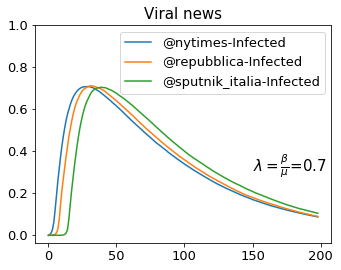

In [183]:
plt.subplots(figsize=FIGSIZE_ONECOL)
plt.plot(infected_ny[:199], label ="@nytimes-Infected")
plt.plot(infected_rep[:199], label = "@repubblica-Infected")
plt.plot(infected_sput[:199], label ="@sputnik_italia-Infected")
plt.legend()
plt.title("Viral news")
plt.text(150,0.3, r'$\lambda = \frac{\beta}{\mu}$='+'{:.1f}'.format(Lambda))
plt.ylim(ymax = 1)
plt.tight_layout()
plt.savefig('../../report/images/spreading/news_viral.pdf', format='pdf')

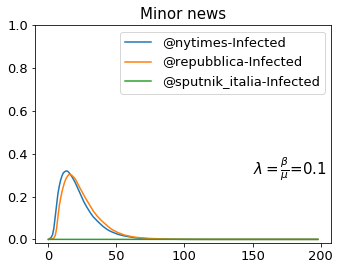

In [184]:
plt.subplots(figsize=FIGSIZE_ONECOL)
plt.plot(infected_ny_loc[:199], label ="@nytimes-Infected")
plt.plot(infected_rep_loc[:199], label = "@repubblica-Infected")
plt.plot(infected_sput_loc[:199], label ="@sputnik_italia-Infected")
plt.legend()
plt.title("Minor news")
plt.text(150,0.3, r'$\lambda = \frac{\beta}{\mu}$='+'{:.1f}'.format(Lambda_loc))
plt.ylim(ymax = 1)
plt.tight_layout()
plt.savefig('../../report/images/spreading/news_minor.pdf', format='pdf')